# Smart Housing Advisor
Tri Blankley and Kassidy Maberry

2025/05/06

Data provided by Redfin, a national real estate brokerage.

Link: https://www.redfin.com/news/data-center

In [1]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as sb
import plotly.express as px

# For rendering plotly graphs
import plotly.io as pio
pio.renderers.default = 'iframe'


"""
Loads plot data.
"""
def load_data():
    d = pd.read_csv("city_market_tracker.tsv000", sep="\t")
    d["PERIOD_BEGIN"] = pd.to_datetime(d["PERIOD_BEGIN"])
    d["PERIOD_END"] = pd.to_datetime(d["PERIOD_END"])
    # TODO: Convert dates into datatime.
    return d

data = load_data()
print("Data has loaded")

Data has loaded


In [2]:
print(data.keys())

Index(['PERIOD_BEGIN', 'PERIOD_END', 'PERIOD_DURATION', 'REGION_TYPE',
       'REGION_TYPE_ID', 'TABLE_ID', 'IS_SEASONALLY_ADJUSTED', 'REGION',
       'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES',
       'PENDING_SALES_MOM', 'PENDING_SALES_YOY', 'NEW_LISTINGS',
       'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM',
       'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM', 'MEDIAN_DOM_MOM',
       'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_MOM',
       'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST', 'SOLD_ABOVE_LIST_MOM',
 

# Task 1: User Input

In [3]:
income = float(input("Enter your annual income: "))
downPay = float(input("Enter your down payment: "))
prefered = input("Enter your prefered city (optional): ")

Enter your annual income:  65000
Enter your down payment:  25000
Enter your prefered city (optional):  


# Task 2: Affordability Estimation

In [4]:
monthlyBudget = (income * .3)/12
loanDur = int(input("Enter a loan duration in months: "))
houseBudget = downPay + monthlyBudget * loanDur
out = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
out = out[["MEDIAN_SALE_PRICE", "CITY"]]
print("You can afford houses from the following cities.")
print(out)

Enter a loan duration in months:  120


You can afford houses from the following cities.
         MEDIAN_SALE_PRICE                                               CITY
1                  82625.0                                        Hainesville
2                  67256.0                                          Maysville
5                 154900.0  Augusta-Richmond County consolidated governmen...
8                 126000.0                                            Laplace
9                  63500.0                                    Egypt Lake-Leto
...                    ...                                                ...
5818721           129292.0                                      Taylors Falls
5818723           128000.0                                         West Point
5818727           204900.0                                       Four Corners
5818728           143617.0                                          Dickinson
5818729            43000.0                                             Ashley

[2866775 rows 

# Task 3: Market Trend Analysis

Enter your prefered city (optional):  


Unknown city defaulting to all


/nix/store/dqpw1jlvpgna3kgcyai4zyr40ljs7yr1-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



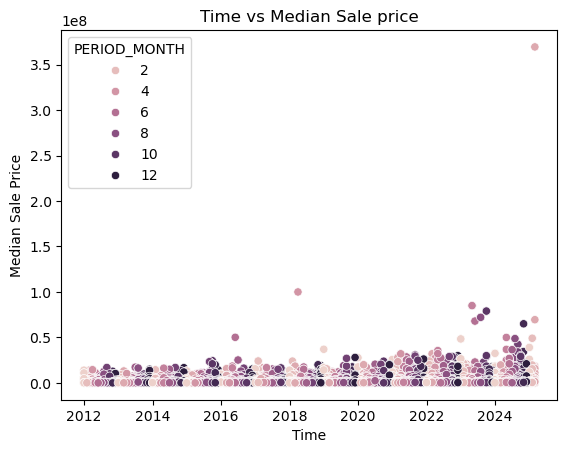

In [5]:
city = input("Enter your prefered city (optional): ")
market = data[data["CITY"] == city]
if market.size == 0:
    print("Unknown city defaulting to all")
    market = data
    city = ""
else:
    city = " in " + city

market.insert(1, "PERIOD_YEAR", market["PERIOD_BEGIN"].dt.year)
market.insert(1, "PERIOD_MONTH", market["PERIOD_BEGIN"].dt.month)
sb.scatterplot(market, x="PERIOD_BEGIN", y="MEDIAN_SALE_PRICE", hue="PERIOD_MONTH")
mlp.xlabel("Time")
mlp.ylabel("Median Sale Price")
mlp.title(f"Time vs Median Sale price{city}")
mlp.show()

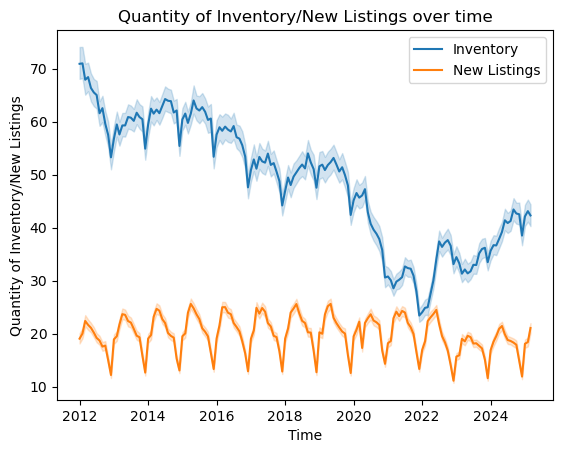

In [6]:
sb.lineplot(market, x="PERIOD_BEGIN", y="INVENTORY", label="Inventory")
sb.lineplot(market, x="PERIOD_BEGIN", y="NEW_LISTINGS", label="New Listings")
mlp.ylabel("Quantity of Inventory/New Listings")
mlp.xlabel("Time")
mlp.title(f"Quantity of Inventory/New Listings over time{city}")
mlp.show()

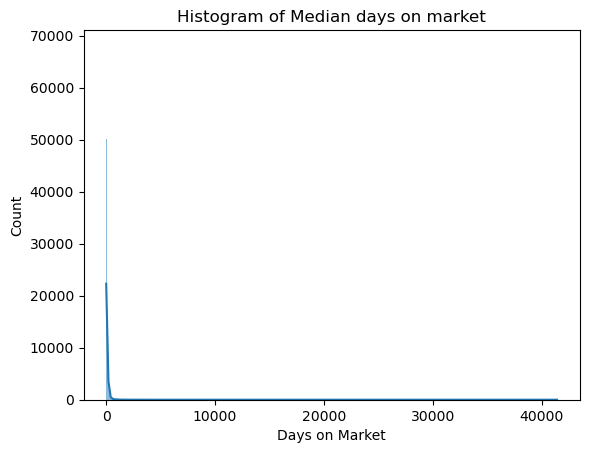

In [7]:
sb.histplot(market, x="MEDIAN_DOM", kde=True)
mlp.title(f"Histogram of Median days on market{city}")
mlp.xlabel("Days on Market")
mlp.show()

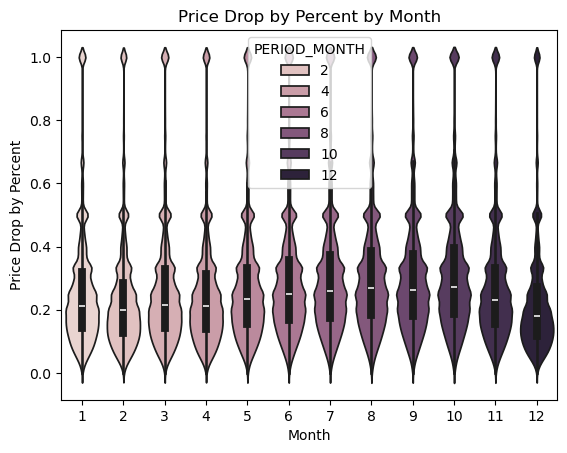

In [8]:
sb.violinplot(market, x="PERIOD_MONTH", y="PRICE_DROPS", hue="PERIOD_MONTH")
mlp.title(f"Price Drop by Percent by Month{city}")
mlp.xlabel("Month")
mlp.ylabel("Price Drop by Percent")
mlp.show()

In [9]:
houses = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
fig = px.scatter(houses, x="MEDIAN_SALE_PRICE", y="CITY")
fig.show()

# Task 4: Generate Insights

In [13]:
# Estimagted cost of house within your budget -----------------------------------------------------------------------
print(f"Your estimated house budget is ${houseBudget}")

out = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
out = out[["CITY", "STATE_CODE"]]
vals = out.values
val = int(input("How many cities do you want to print?"))
i = 0
print("Places that fit your budget:")
for c in vals:
    if i == val:
        break
    print(f"- {c[0]}, {c[1]}")
    i += 1

if i == 0:
    print("We searched far and wide but no cities fit your budget.")

# Show cities where the price of houses is falling ----------------------------------------------------------------
# Group data by city and get the first and last median sale prices
# Where a period is given for the time differnce of house value
price_trends = data.sort_values(by="PERIOD_BEGIN").groupby("CITY").agg(
    first_price=("MEDIAN_SALE_PRICE", "first"),
    last_price=("MEDIAN_SALE_PRICE", "last")
)
# Add price trends to dataset for printing and sorting vlaues
price_trends["price_change"] = price_trends["last_price"] - price_trends["first_price"]
price_trends["price_change_pct"] = 100 * price_trends["price_change"] / price_trends["first_price"]

# Cities with price drops
print("\nTop 10 cities with price drops:")
# Actual sorting of the price trends
price_drops = price_trends[price_trends["price_change"] < 0].sort_values(by="price_change_pct")
print(price_drops.head(10))


# Cities where the houses are not aggregiously marked up from their lising price ------------------------------------
# Get the most recent entry per city for sale-to-list analysis
latest_dates = data.groupby("CITY")["PERIOD_BEGIN"].max().reset_index()
latest_data = data.merge(latest_dates, on=["CITY", "PERIOD_BEGIN"], how="inner")

# Filter by minimal markup (sale price at or below list price)
minimal_markup = latest_data[latest_data["AVG_SALE_TO_LIST"] <= 1.0]

# Sort by AVG_SALE_TO_LIST ascending
minimal_markup = minimal_markup.sort_values(by="AVG_SALE_TO_LIST")

print("\nTop 3 cities where homes are being sold near or below list price, without a markup:")
for i, row in minimal_markup.head(3).iterrows(): # add the head(3) to show only the three cheapest cities
    print(f"- {row['CITY']}, {row['STATE_CODE']}: Avg Sale-to-List = {row['AVG_SALE_TO_LIST']:.2f}")

# City where you have the most time to deleberate on the house purchase -----------------------------------------
# Find the most recent period for each city
latest_dom_dates = data.groupby("CITY")["PERIOD_BEGIN"].max().reset_index()
latest_dom_data = data.merge(latest_dom_dates, on=["CITY", "PERIOD_BEGIN"], how="inner")

# Drop rows with missing Day-on-market (DOM) values
latest_dom_data = latest_dom_data.dropna(subset=["MEDIAN_DOM"])

# Find the city with the highest median days on market using loc and idxmax
longest_dom_city = latest_dom_data.loc[latest_dom_data["MEDIAN_DOM"].idxmax()]

print("\nCity where homes stay the longest on the market (more time to decide):")
print(f"- {longest_dom_city['CITY']}, {longest_dom_city['STATE_CODE']}: "
      f"{int(longest_dom_city['MEDIAN_DOM'])} median days on market")

# Show the best city for a given property type -------------------------------------------------------------
# Display the unique property type options so the user can choose with correct spelling
property_types = data["PROPERTY_TYPE"].unique()
print("\nAvailable Property Types:")
for property_type in property_types:
    print(f"- {property_type}")

# Get the desired property type from the user
property_type = input("Enter the desired property type (e.g., 'Single Family', 'Condo', etc.): ")


# Filter the dataset by the chosen property type
property_data = data[data["PROPERTY_TYPE"].str.contains(property_type, case=False, na=False)]

# Group by city and count the number of listings
property_count_by_city = property_data.groupby("CITY")["PROPERTY_TYPE"].count().reset_index()
property_count_by_city = property_count_by_city.rename(columns={"PROPERTY_TYPE": "listing_count"})

# Find the city with the most listings for the given property type
city_with_most_options = property_count_by_city.loc[property_count_by_city["listing_count"].idxmax()]

print(f"\nCity with the most {property_type} listings:")
print(f"- {city_with_most_options['CITY']}, {city_with_most_options['listing_count']} listings")



Your estimated house budget is $220000.0


How many cities do you want to print? 3


Places that fit your budget:
- Hainesville, IL
- Maysville, NC
- Augusta-Richmond County consolidated government (balance), GA

Top 10 cities with price drops:
               first_price  last_price  price_change  price_change_pct
CITY                                                                  
Johnsonburg       360000.0     10000.0     -350000.0        -97.222222
Cut Off            42000.0      1300.0      -40700.0        -96.904762
Windsor          6300000.0    290000.0    -6010000.0        -95.396825
Hardesty          195000.0      9000.0     -186000.0        -95.384615
Belle Vernon      331000.0     17000.0     -314000.0        -94.864048
Carbon             49500.0      2793.0      -46707.0        -94.357576
Belvedere        3217500.0    197500.0    -3020000.0        -93.861694
Star Junction     349000.0     22500.0     -326500.0        -93.553009
Braddock          662500.0     45000.0     -617500.0        -93.207547
Lexa              220000.0     15000.0     -205000.0       

Enter the desired property type (e.g., 'Single Family', 'Condo', etc.):  Condo



City with the most Condo listings:
- Springfield, 893 listings
